In [1]:


import sys
import numpy as np
import re


stats = {
    r".+cores1.+\.commitStats0\.numInsts .+ (\d+) .+" : "insts",
    r".+\.branchPred\.btb\.mispredict::total .+ (\d+) .+" : "BTB_mispredict",
    r".+\.branchPred\.mispredicted_0::total .+ (\d+) .+" : "BPU_mispredict",
    r".+\.branchPred\.mispredicted_0::DirectCond .+ (\d+) .+" : "BPU_cond_mispredict",
    r".+\.branchPred\.btb\.mispredict::DirectCond .+ (\d+) .+" : "BTB_cond_mispredict",
}

TAGE-SC-L [3.11916e+05 3.64020e+04 8.41009e+05 1.54000e+02 1.14410e+04 1.80800e+03
 7.70000e+02 1.44900e+03 6.77400e+03 7.00000e+00 9.53000e+02 2.27700e+03
 2.26800e+03 5.40000e+02 2.61000e+03 5.79000e+02 1.03900e+03 2.38700e+03
 4.76000e+02 8.15000e+02 1.15800e+03 1.76000e+03 4.77000e+02 1.93300e+03
 0.00000e+00 1.29400e+03 1.00000e+00 1.79200e+03 2.56000e+02 1.84100e+03
 1.00000e+00 1.16200e+03 4.02000e+02 1.83900e+03 7.00000e+00 4.51000e+02
 4.47000e+02 6.69000e+02 1.18100e+03]
TAGE-SC-L [3.40083870e+07 5.91916200e+06 2.73035225e+08 1.65200000e+04
 1.17222200e+06 1.15530000e+05 1.98337000e+05 1.22082000e+05
 5.15490000e+05 7.67000000e+02 2.30484000e+05 3.14926000e+05
 3.08139000e+05 1.29002000e+05 4.09833000e+05 1.54926000e+05
 2.94084000e+05 3.58533000e+05 1.28721000e+05 2.48548000e+05
 2.89405000e+05 2.98133000e+05 8.39530000e+04 3.81046000e+05
 5.51000000e+02 3.39308000e+05 1.10000000e+02 2.84194000e+05
 1.21572000e+05 3.59519000e+05 6.97000000e+02 2.36927000e+05
 1.29851000e+05 

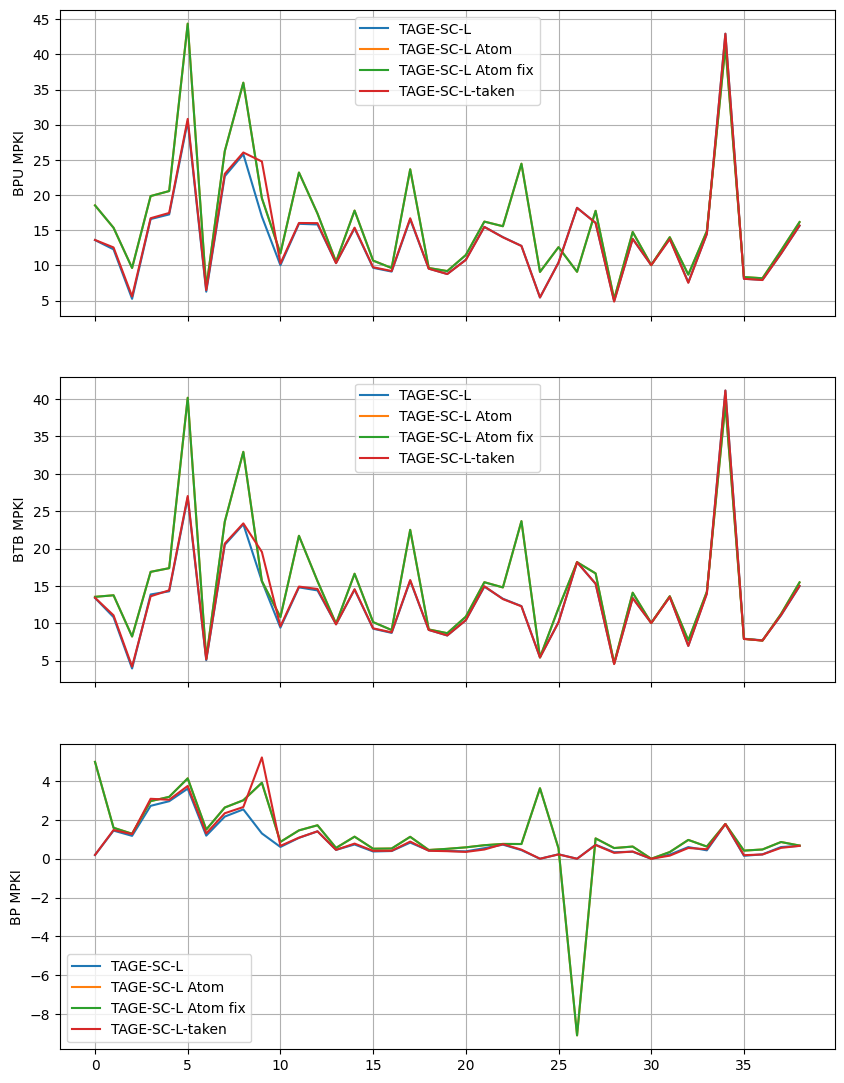

In [6]:

configs = [
    # ("nAtom_ltage", "LTAGE"),
    # ("nAtom_ltage_taken", "LTAGE-taken"),
    # ("nAtom_ltage_TKfix_taken", "LTAGE-taken"),
    # ("nAtom_ltage_TKfix", "LTAGE"),
    # ("nAtom_ltage_develop", "LTAGE-dev"),
    # ("nAtom_ltage_surp", "LTAGE-surp"),
    # ("nAtom_tsl", "TAGE-SC-L"),
    # ("nAtom_tsl_develop", "TAGE-SC-L-dev"),
    # ("nAtom_tsl_surp", "TAGE-SC-L-surp"),
    # ("nAtom_tsl_surp2", "TAGE-SC-L-surp2"),
    # ("nAtom_tsl_surp3f", "TAGE-SC-L-surp3"),
    # ("nAtom_tsl_TKfix", "TAGE-SC-L-gem5"),
    # ("nAtom_tsl_noSCL", "TAGE-SC-L-gem5-noSC"),
    # ("nAtom_ref", "TAGE-SC-L-orignal"),
    # ("nAtom_ref_noSCL", "TAGE-SC-L-orignal-noSC"),
    # ("nAtom_tsl_noSC", "TAGE-SC-L-noSC"),
    # ("nAtom_ref_SCL", "TAGE-SC-L-orignal"),
    ("nAtom_tsl_SCL", "TAGE-SC-L"),
    ("Atom_tsl", "TAGE-SC-L Atom"),
    ("fAtom_tsl", "TAGE-SC-L Atom fix"),
    # ("nnginx/nAtom_tsl", "TAGE-SC-L Nginx"),
    ("nAtom_tsl_taken", "TAGE-SC-L-taken"),
    # ("nnginx/nAtom_tsl_taken", "TAGE-SC-L-taken Nginx"),
    # ("nAtom_PFC_tsl", "TAGE-SC-L PFC"),
    # ("nAtom_PFC_tsl_taken", "TAGE-SC-L-taken PFC"),
    # ("nAtom_lt", "L-TAGE"),
    # ("nAtom_lt_taken", "L-TAGE-taken"),


    # ("nAtom_ref", "TSL-ref"),
    # ("nAtom_ref", "TSL-ref"),
]

dir = "../wkdir4/results"

data = {}

for p, n in configs:
    fn = f"{dir}/{p}/stats.txt"
    data[n] = {kk : [] for kk in stats.values()}
    with open(fn) as f:
        for line in f:
            for key in stats:
                m = re.match(key, line)
                if m:
                    # print(m)
                    data[n][stats[key]].append(m.group(1))
                    break
    

data2 = {}
for key in data:
    data2[key] = {}
    _min = 10000000
    for kk in data[key]:
        _min = min(_min, len(data[key][kk]))
        data2[key][kk] = np.array(data[key][kk], dtype=float)

    data2[key]["BTB MPKI"] = (data2[key]["BTB_mispredict"][:_min] / data2[key]["insts"][:_min]) * 1000
    data2[key]["BPU MPKI"] = (data2[key]["BPU_mispredict"][:_min] / data2[key]["insts"][:_min]) * 1000
    data2[key]["BP MPKI"] = ((data2[key]["BPU_cond_mispredict"][:_min] - data2[key]["BTB_cond_mispredict"][:_min]) / data2[key]["insts"][:_min]) * 1000


# print("BTB MPKI: ", (btb_m[:_min] / inst[:_min]) * 1000)
# print("BPU MPKI: ", (bpu_m[:_min] / inst[:_min]) * 1000)
# print("BP MPKI: ", ((bpu_cond_m[:_min] - btb_cond_m[:_min]) / inst[:_min]) * 1000)

import matplotlib.pyplot as plt


metrics = ["BPU MPKI","BTB MPKI",  "BP MPKI"]

fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 4.5*len(metrics)), sharex=True)



for key in data2:
    for i, kk in enumerate(metrics):
        axs[i].plot(data2[key][kk], label=key)

    print(key, data2[key]["BPU_cond_mispredict"])
    print(key, data2[key]["insts"])
    
for i, kk in enumerate(metrics):
    axs[i].legend()
    # axs[i].set_xlabel("Time")
    axs[i].set_ylabel(kk)
    axs[i].grid()





TAGE-SC-L [3.11916e+05 3.64020e+04 8.41009e+05 1.54000e+02 1.14410e+04 1.80800e+03
 7.70000e+02 1.44900e+03 6.77400e+03 7.00000e+00 9.53000e+02 2.27700e+03
 2.26800e+03 5.40000e+02 2.61000e+03 5.79000e+02 1.03900e+03 2.38700e+03
 4.76000e+02 8.15000e+02 1.15800e+03 1.76000e+03 4.77000e+02 1.93300e+03
 0.00000e+00 1.29400e+03 1.00000e+00 1.79200e+03 2.56000e+02 1.84100e+03
 1.00000e+00 1.16200e+03 4.02000e+02 1.83900e+03 7.00000e+00 4.51000e+02
 4.47000e+02 6.69000e+02 1.18100e+03]
TAGE-SC-L Atom [4.798420e+05 5.455100e+04 2.039123e+06 2.080000e+02 1.532100e+04
 3.412000e+03 8.710000e+02 1.885000e+03 1.201000e+04 9.000000e+00
 1.339000e+03 4.580000e+03 2.738000e+03 5.670000e+02 3.646000e+03
 7.370000e+02 1.183000e+03 4.944000e+03 4.880000e+02 9.210000e+02
 1.360000e+03 1.990000e+03 6.090000e+02 6.397000e+03 2.000000e+00
 2.036000e+03 0.000000e+00 2.276000e+03 2.870000e+02 2.188000e+03
 1.000000e+00 1.211000e+03 5.450000e+02 1.968000e+03 6.000000e+00
 4.910000e+02 4.820000e+02 7.310000e+

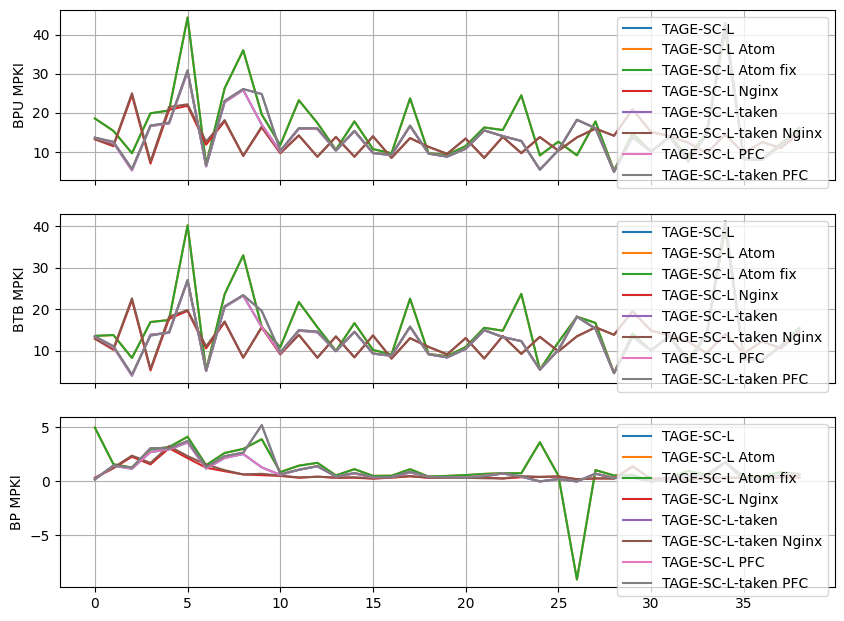

In [4]:
import matplotlib.pyplot as plt


metrics = ["BPU MPKI","BTB MPKI",  "BP MPKI"]

fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 2.5*len(metrics)), sharex=True)



for key in data2:
    for i, kk in enumerate(metrics):
        axs[i].plot(data2[key][kk], label=key)

    print(key, data2[key]["BPU_cond_mispredict"])
    
for i, kk in enumerate(metrics):
    axs[i].legend()
    # axs[i].set_xlabel("Time")
    axs[i].set_ylabel(kk)
    axs[i].grid()


In [11]:

configs = [

    # ("nAtom_tsl_SCL", "TAGE-SC-L"),
    ("Atom_tsl", "TAGE-SC-L"),
]



bms = [
    "nodeapp",
    "nodeapp-nginx",
    "proto",
    "swissmap",
    "libc",
    "tcmalloc",
    "compression",
    "hashing",
    "stl",
]


dir = "../results"

data = {}

for bm in bms:
    for p, c in configs:
        fn = f"{dir}/{p}/{bm}/stats.txt"
        n = f"{bm} {c}"
        data[n] = {kk : [] for kk in stats.values()}
        with open(fn) as f:
            for line in f:
                for key in stats:
                    m = re.match(key, line)
                    if m:
                        # print(m)
                        data[n][stats[key]].append(m.group(1))
                        break
    




nodeapp TAGE-SC-L [9.63228e+05 3.55205e+05 3.93000e+02 3.23900e+03 4.73000e+02 2.21100e+03
 4.53000e+02 2.21200e+03 2.63000e+02 1.01680e+04 5.31945e+05 1.35000e+02
 1.58400e+03 3.07000e+02 1.69800e+03 3.52000e+02 9.23000e+02 1.65000e+02
 1.01089e+05 1.41883e+05 3.30790e+04 2.26090e+04 1.74944e+05 4.80000e+01
 8.53000e+02 5.40000e+01 3.88000e+02 6.70000e+01 5.26000e+02 4.20000e+01
 4.18620e+04 0.00000e+00 1.59940e+04 1.37976e+05 1.53285e+05 1.46914e+05
 2.33880e+04 3.77530e+04 8.57180e+04 1.00499e+05 4.35000e+02 1.88900e+03
 1.60000e+02 1.21500e+03 3.65000e+02 2.09500e+03 4.60000e+01 9.23600e+04
 3.35910e+04 5.92900e+04 1.76500e+03 0.00000e+00 3.10000e+02 0.00000e+00
 0.00000e+00 1.90000e+02 5.09000e+02 1.10000e+01 4.80000e+01 1.62000e+02
 3.60000e+01 3.12000e+02 1.15590e+04 1.26238e+05 1.42700e+03 1.68265e+05
 1.28560e+04 1.15537e+05 8.47400e+03 5.64130e+04 3.22865e+05 1.42620e+04
 0.00000e+00 9.07620e+04 0.00000e+00 0.00000e+00 4.36000e+02 5.61000e+02
 1.70000e+01 2.57000e+02 7.60000e

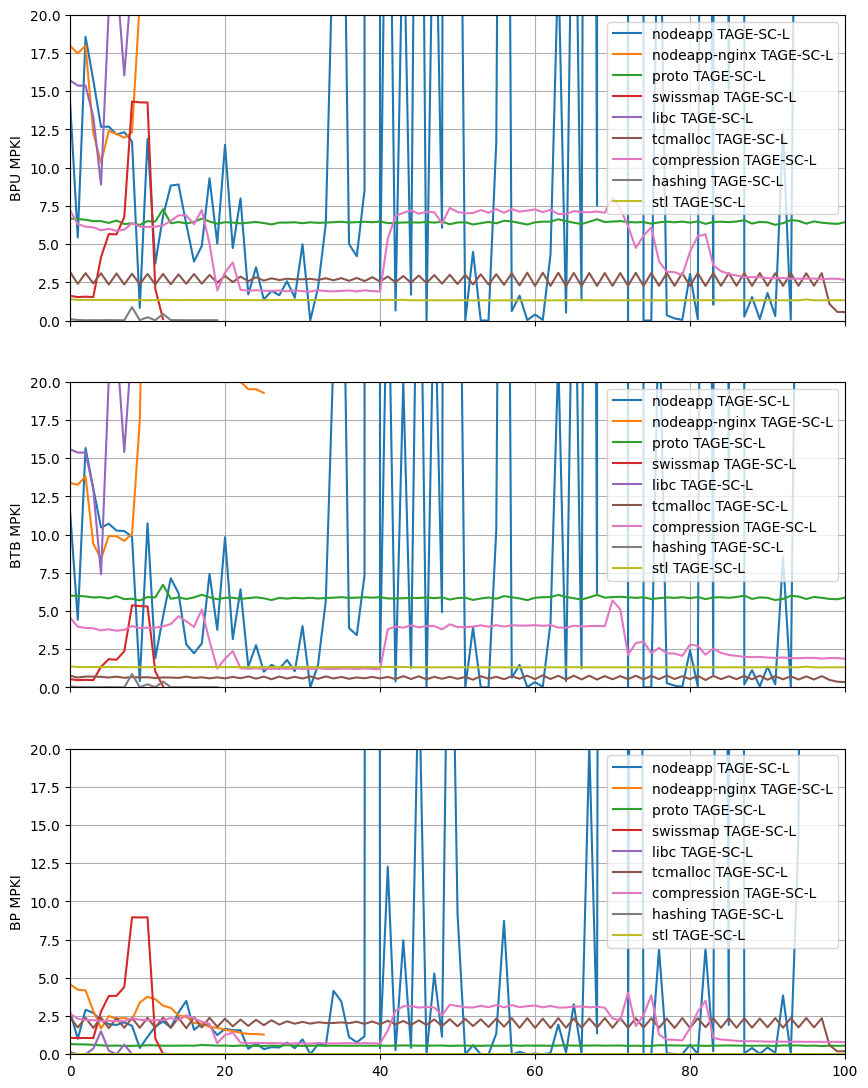

In [12]:

data2 = {}
for key in data:
    data2[key] = {}
    _min = 10000000
    for kk in data[key]:
        _min = min(_min, len(data[key][kk]))
        data2[key][kk] = np.array(data[key][kk], dtype=float)

    data2[key]["BTB MPKI"] = (data2[key]["BTB_mispredict"][:_min] / data2[key]["insts"][:_min]) * 1000
    data2[key]["BPU MPKI"] = (data2[key]["BPU_mispredict"][:_min] / data2[key]["insts"][:_min]) * 1000
    data2[key]["BP MPKI"] = ((data2[key]["BPU_cond_mispredict"][:_min] - data2[key]["BTB_cond_mispredict"][:_min]) / data2[key]["insts"][:_min]) * 1000


# print("BTB MPKI: ", (btb_m[:_min] / inst[:_min]) * 1000)
# print("BPU MPKI: ", (bpu_m[:_min] / inst[:_min]) * 1000)
# print("BP MPKI: ", ((bpu_cond_m[:_min] - btb_cond_m[:_min]) / inst[:_min]) * 1000)

import matplotlib.pyplot as plt


metrics = ["BPU MPKI","BTB MPKI",  "BP MPKI"]

fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 4.5*len(metrics)), sharex=True)



for key in data2:
    for i, kk in enumerate(metrics):
        axs[i].plot(data2[key][kk], label=key)

    print(key, data2[key]["BPU_cond_mispredict"])
    print(key, data2[key]["insts"])
    
for i, kk in enumerate(metrics):
    axs[i].legend()
    # axs[i].set_xlabel("Time")
    axs[i].set_ylabel(kk)
    axs[i].grid()

    axs[i].set_xlim(0, 100)
    axs[i].set_ylim(0, 20)



